In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

In [2]:
train=pd.read_csv("train.csv")
train.set_index('PassengerId')
test=pd.read_csv("test.csv", )
test.set_index('PassengerId')

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
PassengerId,,,,,,,,,,,,
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore


In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train.drop('Cabin', inplace=True, axis=1)
train.drop('Name', inplace=True, axis=1)

In [5]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [6]:
train.shape


(8693, 12)

In [7]:
train=train.dropna(how='any')

In [8]:
train.isnull().sum()


PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [9]:
train.shape

(6923, 12)

In [10]:
train.dtypes


PassengerId      object
HomePlanet       object
CryoSleep        object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

In [11]:
train['VIP'].unique()

array([False, True], dtype=object)

In [12]:

train=train.replace({'Destination': {'TRAPPIST-1e': 0, 'PSO J318.5-22': 1, '55 Cancri e': 2}})
train=train.replace({'HomePlanet': {'Europa': 0, 'Earth': 1, 'Mars': 2}})
train=train.replace({'CryoSleep': {'False': 0, 'True': 1}})
train=train.replace({'VIP': {'False': 0, 'True': 1}})

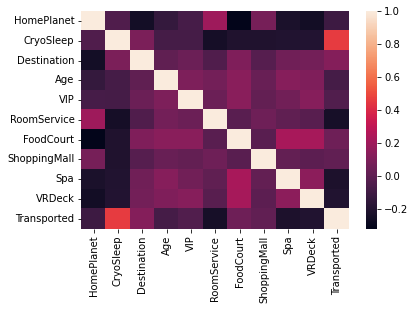

In [13]:
import seaborn as sns
corr = train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


In [14]:
#preprocessing done
X = train.drop('Transported',axis= 1)
y = train['Transported']
print(X)
print(y)

     PassengerId  HomePlanet  CryoSleep  Destination   Age    VIP  \
0        0001_01           0      False            0  39.0  False   
1        0002_01           1      False            0  24.0  False   
2        0003_01           0      False            0  58.0   True   
3        0003_02           0      False            0  33.0  False   
4        0004_01           1      False            0  16.0  False   
...          ...         ...        ...          ...   ...    ...   
8688     9276_01           0      False            2  41.0   True   
8689     9278_01           1       True            1  18.0  False   
8690     9279_01           1      False            0  26.0  False   
8691     9280_01           0      False            2  32.0  False   
8692     9280_02           0      False            0  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  
0             0.0        0.0           0.0     0.0     0.0  
1           109.0        9.0          25.0   549.

# **logistic**

In [15]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=100)

# fit the model with data
logreg.fit(X, y)




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=100)

In [16]:
y_pred = logreg.predict(X)

In [17]:

# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y, y_pred)
cnf_matrix


array([[2320, 1120],
       [ 393, 3090]])

In [30]:
c1=test['PassengerId']


0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [18]:
test.drop('Cabin', inplace=True, axis=1)
test.drop('Name', inplace=True, axis=1)
test=test.replace({'Destination': {'TRAPPIST-1e': 0, 'PSO J318.5-22': 1, '55 Cancri e': 2}})
test=test.replace({'HomePlanet': {'Europa': 0, 'Earth': 1, 'Mars': 2}})
test=test.replace({'CryoSleep': {'False': 0, 'True': 1}})
test=test.replace({'VIP': {'False': 0, 'True': 1}})

In [19]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [20]:
test.describe()

,HomePlanet,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4190.000000,4185.000000,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,0.981623,0.494624,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,0.677994,0.807489,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,2.000000,2.000000,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [21]:
#replacing mean values in column with int or float
mean_to_replace={"HomePlanet": 1,"CryoSleep": 1,"Destination": 0.5,"Age": 25,"VIP": 1,"RoomService": 219,"FoodCourt":439,"ShoppingMall": 177,"Spa": 303,"VRDeck": 310}
test=test.fillna(value=mean_to_replace)

In [24]:
y_pred = logreg.predict(test)

In [25]:
y_pred

array([ True, False,  True, ...,  True,  True,  True])

In [27]:
sub = pd.DataFrame(y_pred)

In [32]:
pd.concat([pd.DataFrame(c1),pd.DataFrame(y_pred)],axis=1).to_csv("Sub.csv")